# CREATE WORDCLOUD FROM MULTIPLE DOCUMENTS

In [1]:
import os
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import PyPDF2
import textract
import traceback
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kadirakbudak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kadirakbudak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# STEP 1: Read the PDF files

## METHOD 1: Using textract

NOTE: textract supports reading of other documents as well like DOCX, JPG etc
Refer: https://textract.readthedocs.io/en/stable/

In [2]:
def read_file_textract(filepath):
    text = textract.process(filepath)
    return text.decode("utf-8") 

## METHOD 2: Using PyPDF

In [3]:
def read_file_pypdf(filepath):
    pdfFileObj = open(filepath,'rb')
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    num_pages = len(pdfReader.pages)
    text = ""
    # Read all the pages
    for pg in range(num_pages):
        page = pdfReader.pages[pg]
        text += page.extract_text()
    return text  
        
        

## Read file using any of the pdf readers

In [4]:
def read_file(filepath, use_method = 'textract'):
    
    text = ""
    if not os.path.isfile(filepath):
        print(f'Invalid file:{filepath}')
    else:
        if use_method == 'textract':
            return read_file_textract(filepath)
        elif use_method == 'pypdf':
            return read_file_pypdf(filepath)
        else:
            print('Invalid method to read file. Supported formats: "textract" or "pypdf".')
    
    return text

# STEP 2: Identify the keywords in the document

In [5]:
def extract_keywords(text, ignore_words = [],
                     min_word_length = 0,
                     ignore_numbers = True,
                     ignore_case = True):
    # Remove words with special characters
    filtered_text = ''.join(filter(lambda x:x in string.printable, text))
    
    # Create word tokens from the text string
    tokens = word_tokenize(filtered_text)
    
    # List of punctuations to be ignored 
    punctuations = ['(',')',';',':','[',']',',','.','--','-','#','!','*','"','%']
    
    # Get the stopwords list to be ignored
    stop_words = stopwords.words('english')

    # Convert ignore words from user to lower case
    ignore_words_lower = [x.lower() for x in ignore_words]
    
    # Combine all the words to be ignored
    all_ignored_words = punctuations + stop_words + ignore_words_lower
    
    # Get the keywords list
    keywords = [word for word in tokens \
                    if  word.lower() not in all_ignored_words
                    and len(word) >= min_word_length]    

    # Remove keywords with only digits
    if ignore_numbers:
        keywords = [keyword for keyword in keywords if not keyword.isdigit()]

    # Return all keywords in lower case if case is not of significance
    if ignore_case:
        keywords = [keyword.lower() for keyword in keywords]
    
    return keywords
    
    

# STEP 3: Create the wordcloud

In [18]:
def create_word_cloud(keywords, maximum_words = 100, bg = 'white', cmap='Dark2',
                     maximum_font_size = 256, width = 3000, height = 2000,
                     random_state = 42, fig_w = 15, fig_h = 10, output_filepath = None):
    
    # Convert keywords to dictionary with values and its occurences
    word_could_dict=Counter(keywords)

    wordcloud = WordCloud(background_color=bg, max_words=maximum_words, colormap=cmap, 
                          stopwords=STOPWORDS, max_font_size=maximum_font_size,
                          random_state=random_state, 
                          width=width, height=height, normalize_plurals=False).generate_from_frequencies(word_could_dict)
    
    plt.figure(figsize=(fig_w,fig_h))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if output_filepath:
        plt.savefig(output_filepath, bbox_inches='tight')
    plt.show()
    plt.close()

# PUTTING IT TOGETHER

## WORDCLOUD FOR A SINGLE FILE

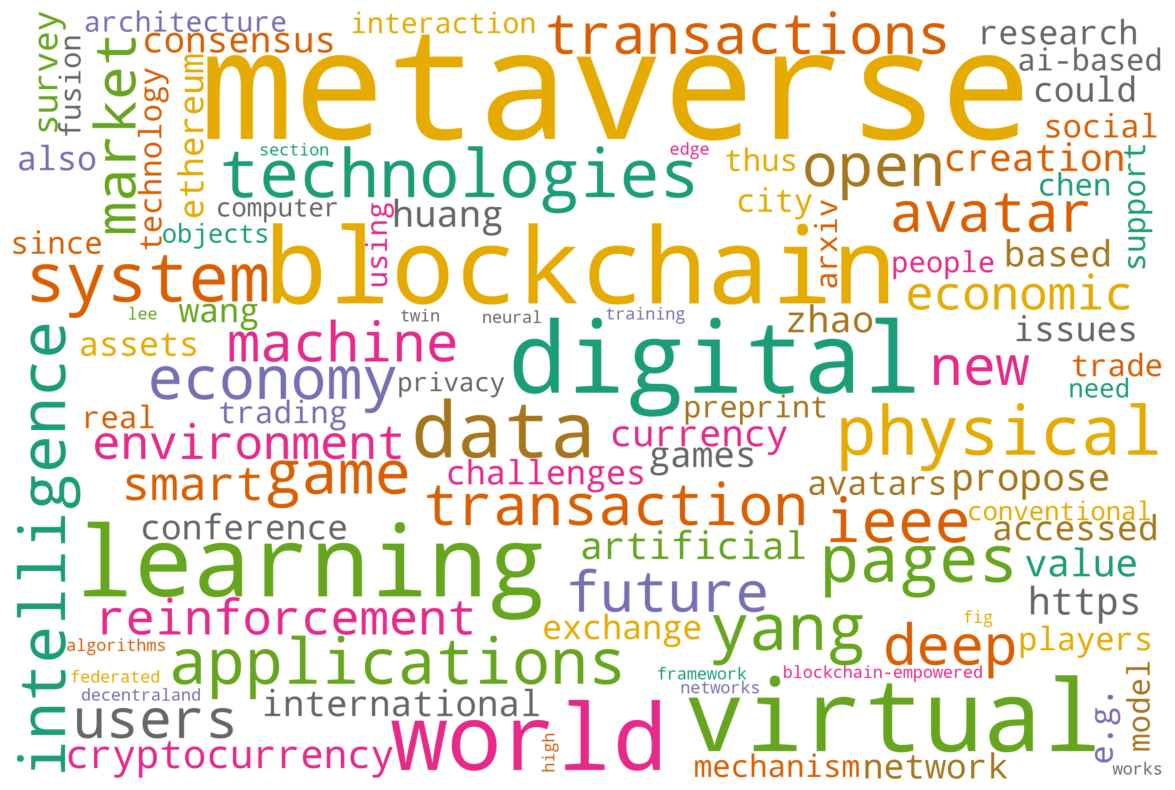

In [7]:
filepath = 'sample_files/AI_Blockchain_Survey_2022.pdf'
file_text = read_file(filepath)
outputfile = 'outputfile.jpg'
keywords = extract_keywords(file_text,min_word_length = 3)
create_word_cloud(keywords, maximum_words=100, maximum_font_size = 400, output_filepath = outputfile)
            

## WORDCLOUD FOR ALL FILES IN A FOLDER

In [34]:
docs_path = '/Users/kadirakbudak/fbfs/kadirpapers'
ignore_words = ['Fig','like','e.g.','i.e.','one', 'proposed', 'ieee', 
                'computations', 'also', 'used', 'based', 'part','output',
                'results', 'international','results','given','siam','figure',
                'shp','acm','two','work','whereas','three','ing','https','use',
                'scheme','may','use','size','single','average','new','methods',
                'section','entries','shows','show','seen','implementation',
                'copyright','better','since','vol','input','using',
                'respectively','university','due','library','http','obtained',
                'different','however','per','corresponding','form','corresponding',
                'second','values','line','article','solution','see','similar',
                'operation','matrices','accessing','well','table','usa','nets',
                'columns','tasks','kernels','nodes','nonzeros','models','systems',
                'rows','architectures','operations','vertices','number','applications',
                'threads','misses','algorithms','tiles','overall','approach','compared',
                'terms','conference','follows','tion']
all_keywords = []

,
for filename in os.listdir(docs_path):
    filepath = os.path.join(docs_path, filename)
    if os.path.isfile(filepath) and filename.endswith('.pdf'):
        print(f'Parsing file: {filename}')
        try:
            file_text = read_file(filepath, 'pypdf')
            keywords = extract_keywords(file_text,min_word_length = 3, ignore_words = ignore_words)
            all_keywords.extend(keywords)
        except:
            print(f'ERROR!!! Unable to parse file: {filename}. Ignoring file!!')
            print(traceback.format_exc())
            break
        

print(f'Completed reading all pdf files in folder:{docs_path}')

Parsing file: 2016-aat-tpds.pdf
Parsing file: 2023-bfs-ijhpca.pdf
Parsing file: 2024-slate-ijhpca.pdf
Parsing file: 2014-spgemm-sisc.pdf
Parsing file: 2024-shaheen.pdf
Parsing file: 2020-lu-isc.pdf
Parsing file: 2018-hicma-europar.pdf
Parsing file: 2018-spgemm-topc.pdf
Parsing file: 2022-slate-p3hpc.pdf
Parsing file: 2024-stencil-pasc.pdf
Parsing file: 2019-sth-tpds.pdf
Parsing file: 2017-spgemm-tpds.pdf
Parsing file: 2017-tlr-isc.pdf
Parsing file: 2013-cache-sisc.pdf


Multiple definitions in dictionary at byte 0x2fc9 for key /ToUnicode
Multiple definitions in dictionary at byte 0x2f04 for key /ToUnicode


Parsing file: 2020-parsec-pasc.pdf
Parsing file: 2021-parsec-ipdps.pdf
Parsing file: 2020-stencil-ijhpca.pdf
Completed reading all pdf files in folder:/Users/kadirakbudak/fbfs/kadirpapers


Dark2


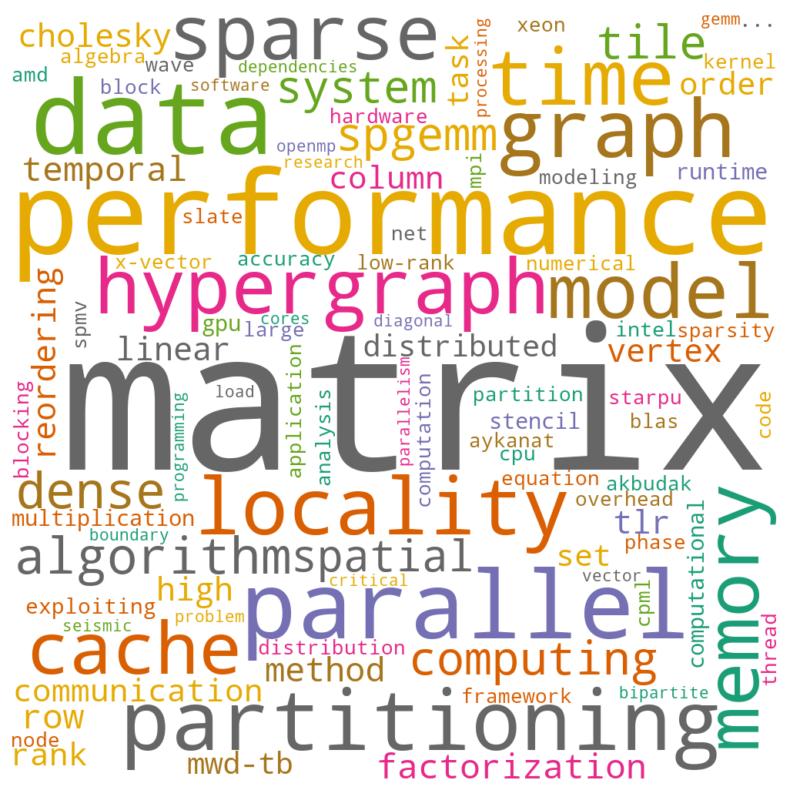

In [36]:
#for cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
#                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']:
cmap='Dark2'
print(cmap)
create_word_cloud(all_keywords, bg = 'white', cmap = cmap,random_state = 100, width = 1000, height = 1000, output_filepath='./'+cmap)

# ADDON: LIST OF TOP KEYWORDS AS DATAFRAME

In [37]:
import pandas as pd 
pd.set_option("max_rows", None)
distinct_keywords_df = pd.DataFrame(all_keywords,columns=['keywords']).value_counts().rename_axis('keyword').reset_index(name='count')
distinct_keywords_df['word_len'] = distinct_keywords_df['keyword'].apply(lambda x: len(x))
distinct_keywords_df.head(50)




OptionError: Pattern matched multiple keys